# posggym-agents policy analysis


## Notation

- **Same-play** refers to pairings of policies that are trained together or at least trained as part of the same population
- **Cross-play** refers to pairings of policies that were not trained together

In [1]:
import os.path as osp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents.plot as plot_utils

from posggym_agents.agents.predatorprey10x10_P2_p3_s2_coop_v0.load import BASE_DIR

# Data Loading

In [7]:
results_filepath = osp.join(BASE_DIR, "results", "pairwise_results.csv")
all_df = plot_utils.import_results(results_filepath)

def get_policy_seed(row, id_key):
    policy_id = row[id_key]
    policy_id = policy_id.replace("-v0", "")
    tokens = policy_id.split("_")
    seed = 'none'
    for t in tokens:
        if t.startswith("seed"):
            seed = t.replace("seed", "")
            break
    return seed
    
def get_policy_type(row, id_key):
    policy_id = row[id_key]
    policy_id = policy_id.replace("-v0", "")
    tokens = policy_id.split("_")
    alg_tokens = []
    for t in tokens:
        if t.startswith("seed"):
            break
        alg_tokens.append(t)
    policy_type = "_".join(alg_tokens)
    if policy_type == "shortestpath-v0":
        policy_type = "shortestpath"
    return policy_type

all_df["policy_seed"] = all_df.apply(lambda r: get_policy_seed(r, "policy_id"), axis=1)
all_df["policy_type"] = all_df.apply(lambda r: get_policy_type(r, "policy_id"), axis=1)
all_df["coplayer_policy_seed"] = all_df.apply(lambda r: get_policy_seed(r, "coplayer_policy_id"), axis=1)
all_df["coplayer_policy_type"] = all_df.apply(lambda r: get_policy_type(r, "coplayer_policy_id"), axis=1)

print("\nColumns")
print("-------")
for c in all_df.columns:
    print(f"  {c}")


Columns
-------
  exp_id
  agent_id
  env_id
  policy_id
  exp_seed
  num_episodes
  time_limit
  episode_return_mean
  episode_return_std
  episode_return_max
  episode_return_min
  episode_steps_mean
  episode_steps_std
  episode_time_mean
  episode_time_std
  num_episode_done
  num_LOSS
  num_DRAW
  num_WIN
  num_NA
  episode_return_CI
  episode_steps_CI
  episode_time_CI
  prop_LOSS
  prop_DRAW
  prop_WIN
  prop_NA
  coplayer_policy_id
  policy_seed
  policy_type
  coplayer_policy_seed
  coplayer_policy_type


## The policies

In [8]:
for k in ["agent_id", "policy_seed", "policy_type", "coplayer_policy_seed", "coplayer_policy_type"]:
    values = all_df[k].unique().tolist()
    values.sort()
    print(f"{k}: {values}")
    
policy_ids = all_df["policy_id"].unique().tolist()
policy_ids.sort()

print("\nPolicy IDs")
print("----------")
for pi_id in policy_ids:
    print(f"  {pi_id}")

agent_id: [0, 1]
policy_seed: ['0', '1', '2', 'none']
policy_type: ['random', 'sp']
coplayer_policy_seed: ['0', '1', '2', 'none']
coplayer_policy_type: ['random', 'sp']

Policy IDs
----------
  random-v0
  sp_seed0-v0
  sp_seed1-v0
  sp_seed2-v0


# The environment

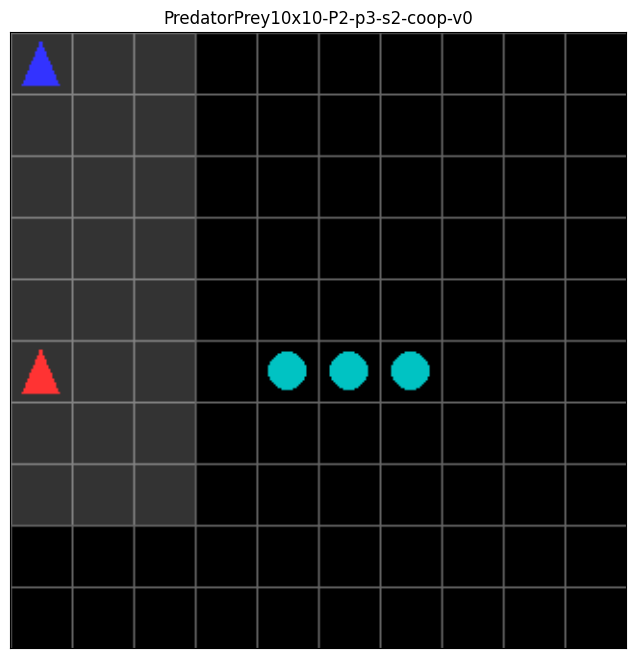

In [14]:
plot_utils.plot_environment(all_df["env_id"].unique()[0])    
plt.show()

## Pairwise Performance

/home/jonathon/code/posggym-agents/posggym_agents/plot/pairwise.py:37: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pw_values[row_policy_idx][col_policy_idx] = group.mean()[y_key]


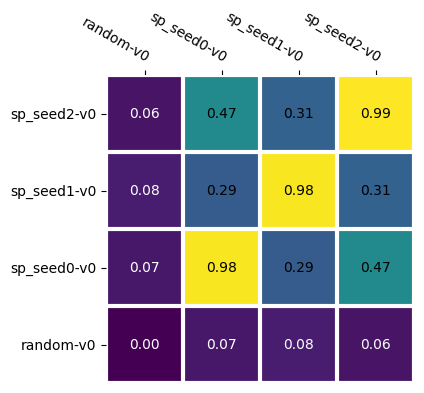

In [11]:
# Performance of Agent 0 policies
plot_utils.plot_pairwise_comparison(
    all_df, 
    y_key="episode_return_mean", 
    policy_key="policy_id",
    coplayer_policy_key="coplayer_policy_id",
    vrange=None, 
    figsize=(len(policy_ids), len(policy_ids)), 
    valfmt="{x:.2f}",
    average_duplicates=True,
    duplicate_warning=False
)

### RL average policy performance

Here we look at average performance of the policies learned using RL by themselves.

Each plot shows the *mean performance* for the *row* policy against the *column* policy.

The **left-hand plot** shows *same-play* performance. So performance of policies against policies from the same training population. With the values shown being the mean over all populations.

The **middle plot** shows *cross-play* performance. So performance of policies against policies from different training populations. With the values shown being the mean over all populations.

The **right-hand plot** shows the generalization gap which is just the difference between the *Same-Play* and *Cross-Play* performance.

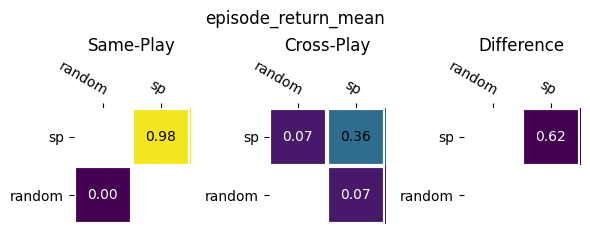

In [17]:
plot_utils.plot_mean_pairwise_comparison(
    all_df, 
    y_key="episode_return_mean", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(0, 1.0), 
    figsize=(6, 3), 
    valfmt="{x:.2f}"
)
plt.show()

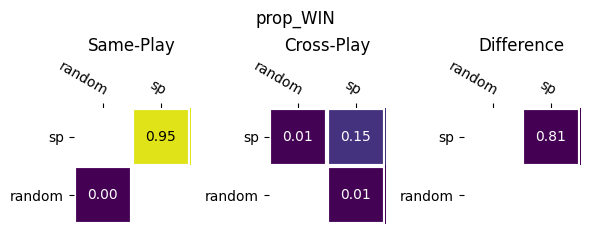

In [18]:
plot_utils.plot_mean_pairwise_comparison(
    all_df, 
    y_key="prop_WIN", 
    policy_key="policy_type",
    pop_key="policy_seed",
    coplayer_pop_key="coplayer_policy_seed",
    coplayer_policy_key="coplayer_policy_type",
    vrange=(0, 1.0), 
    figsize=(6, 3), 
    valfmt="{x:.2f}"
)
plt.show()